# Exercise 15

# Fraud Detection

## Introduction

- Fraud Detection Dataset from Microsoft Azure: [data](http://gallery.cortanaintelligence.com/Experiment/8e9fe4e03b8b4c65b9ca947c72b8e463)

Fraud detection is one of the earliest industrial applications of data mining and machine learning. Fraud detection is typically handled as a binary classification problem, but the class population is unbalanced because instances of fraud are usually very rare compared to the overall volume of transactions. Moreover, when fraudulent transactions are discovered, the business typically takes measures to block the accounts from transacting to prevent further losses. 

In [1]:
%matplotlib inline
import random
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [2]:
import pandas as pd

url = 'https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/datasets/15_fraud_detection.csv.zip'
df = pd.read_csv(url, index_col=0)

In [3]:
df[df.Label==0].head()

,accountAge,digitalItemCount,sumPurchaseCount1Day,sumPurchaseAmount1Day,sumPurchaseAmount30Day,paymentBillingPostalCode - LogOddsForClass_0,accountPostalCode - LogOddsForClass_0,paymentBillingState - LogOddsForClass_0,accountState - LogOddsForClass_0,paymentInstrumentAgeInAccount,ipState - LogOddsForClass_0,transactionAmount,transactionAmountUSD,ipPostalCode - LogOddsForClass_0,localHour - LogOddsForClass_0,Label
0,2000,0,0,0.00,720.25,5.064533,0.421214,1.312186,0.566395,3279.574306,1.218157,599.00,626.164650,1.259543,4.745402,0
1,62,1,1,1185.44,2530.37,0.538996,0.481838,4.401370,4.500157,61.970139,4.035601,1185.44,1185.440000,3.981118,4.921349,0
2,2000,0,0,0.00,0.00,5.064533,5.096396,3.056357,3.155226,0.000000,3.314186,32.09,32.090000,5.008490,4.742303,0
3,1,1,0,0.00,0.00,5.064533,5.096396,3.331154,3.331239,0.000000,3.529398,133.28,132.729554,1.324925,4.745402,0
4,1,1,0,0.00,132.73,5.412885,0.342945,5.563677,4.086965,0.001389,3.529398,543.66,543.660000,2.693451,4.876771,0


In [4]:
df[df.Label==1].head()

,accountAge,digitalItemCount,sumPurchaseCount1Day,sumPurchaseAmount1Day,sumPurchaseAmount30Day,paymentBillingPostalCode - LogOddsForClass_0,accountPostalCode - LogOddsForClass_0,paymentBillingState - LogOddsForClass_0,accountState - LogOddsForClass_0,paymentInstrumentAgeInAccount,ipState - LogOddsForClass_0,transactionAmount,transactionAmountUSD,ipPostalCode - LogOddsForClass_0,localHour - LogOddsForClass_0,Label
19,2000,1,0,0.00,0.00,5.412885,0.342945,5.563677,3.229257,0.000000,2.558238,399.99,399.99,5.008490,4.962055,1
219,1049,1,0,0.00,0.00,5.064533,5.096396,3.444986,3.644960,0.000000,4.315365,1200.68,1200.68,3.291383,4.876771,1
324,1,1,1,18.35,0.00,5.064533,0.342945,4.911509,4.992339,0.002083,4.871762,69.99,69.99,4.471940,4.962055,1
1161,2000,0,0,0.00,64.19,5.064533,0.597837,4.118442,4.207963,281.365278,4.871762,64.19,64.19,4.471940,4.886641,1
3484,1751,0,4,1307.96,1980.46,0.475424,0.448025,4.911509,4.992339,1.294444,2.127196,326.99,326.99,2.068512,4.524580,1


In [5]:
df.shape, df.Label.sum(), df.Label.mean()

((138721, 16), 797, 0.0057453449730033666)

# Exercise 15.1

Partir train test desde el principio semilla aleatoria 42
Estimate a Logistic Regression and a Decision Tree y random forest

Evaluate using the following metrics:
* Accuracy
* F1-Score
* F_Beta-Score (Beta=10)

Comment about the results

In [6]:
X=df.drop(['Label'],axis=1)

In [7]:
y=df.Label
#print(y.head())

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#X_test.index

In [9]:
y_train[y_train==0].head()

6891      0
116379    0
131418    0
63800     0
59692     0
Name: Label, dtype: int64

In [10]:
#Modelos
models = {'lr': LogisticRegression(solver='lbfgs'),
          'dt': DecisionTreeClassifier(),
          'rf': RandomForestClassifier()}

In [11]:
for model in models.keys():
    models[model].fit(X_train, y_train)

C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [12]:
#Calculo de y_pred
y_pred = pd.DataFrame(index=X_test.index, columns=models.keys())
for model in models.keys():
    y_pred[model] = models[model].predict(X_test)
print(y_pred[y_pred.dt==1].head())

       lr  dt  rf
41509   0   1   0
86484   0   1   0
198     0   1   0
49461   0   1   1
30004   0   1   1


In [13]:
y_table = pd.DataFrame(index=['acc','f_1','f_beta'], columns=models.keys())
for model in models.keys():
    y_table[model][0] = metrics.accuracy_score(y_pred[model], y_test)
    y_table[model][1] = metrics.f1_score(y_pred[model], y_test)
    y_table[model][2] = metrics.fbeta_score(y_pred[model], y_test,beta=10)
print(y_table)

              lr        dt        rf
acc     0.994113  0.989163  0.994113
f_1            0  0.137667  0.115523
f_beta         0  0.129649  0.469086


C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


In [14]:
print (' acc_lr:',metrics.accuracy_score(y_pred['lr'], y_test),'\n','acc_dt:',metrics.accuracy_score(y_pred['dt'], y_test),'\n','acc_rf:',metrics.accuracy_score(y_pred['rf'], y_test))

 acc_lr: 0.994112982675349 
 acc_dt: 0.9891630823942139 
 acc_rf: 0.994112982675349


Teniendo en cuenta que la proporción de labels con valor de 1 es mínima, las precisiones para cada uno de los tres métodos son muy altas, lo que nos podría hacer incurrir en el error de que tenemos un buen modelo si no se considera el desbalance que hay entre las dos series de datos, para este caso las series de 1 y 0.

In [15]:
print (' f1_lr:',metrics.f1_score(y_pred['lr'], y_test),'\n','f1_dt:',metrics.f1_score(y_pred['dt'], y_test),'\n','f1_rf:',metrics.f1_score(y_pred['rf'], y_test))

 f1_lr: 0.0 
 f1_dt: 0.13766730401529637 
 f1_rf: 0.11552346570397112


In [16]:
print(' fbeta_lr:',metrics.fbeta_score(y_pred['lr'], y_test,beta=10),'\n','fbeta_dt:',metrics.fbeta_score(y_pred['dt'], y_test,beta=10),'\n','fbeta_rf:',metrics.fbeta_score(y_pred['rf'], y_test,beta=10))

 fbeta_lr: 0.0 
 fbeta_dt: 0.12964877874844 
 fbeta_rf: 0.4690856313497824


In [17]:
# Instanciate a PCA object for the sake of easy visualisation
pca = PCA(n_components = 2)

# Fit and transform x to visualise inside a 2D feature space
x_vis = pca.fit_transform(X_train)
x_vis_test=pca.fit_transform(X_test)

Con el cálculo del fbeta y los valores que está tomando se concluye que se está teniendo en cuenta mucho más la precisión que la sensitividad del modelo, y que esto demuestra que la precisión del modelo no es tan alta como se creía de manera errónea inicialmente.

Para los tres métodos selecciondos se establece que el que brinda peores indicadores de desempeño es la regresión logarítmica, y que la que ofrece mejores o más aceptables resultados es el Random Forests.

# Exercise 15.2

Under-sample the negative class using random-under-sampling

Which is parameter for target_percentage did you choose?
How the results change?

**Only apply under-sampling to the training set, evaluate using the whole test set**

Definición de funciones para under-sampling

In [18]:
def plot_two_classes(X, y, subplot=False, size=(10, 10)):
    # Plot the two classes
    if subplot == False:
        fig, subplot = plt.subplots(nrows=1, ncols=1, figsize=size)
        
    subplot.scatter(X[y==0, 0], X[y==0, 1], label="Class #0", 
                    alpha=0.5, s=70)
    subplot.scatter(X[y==1, 0], X[y==1, 1], label="Class #1", 
                    alpha=0.5, s=70)
    subplot.legend()
    return subplot

In [19]:
def UnderSampling(X, y, target_percentage=0.5, seed=None):
    # Assuming minority class is the positive
    n_samples = y.shape[0]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()

    n_samples_0_new =  n_samples_1 / target_percentage - n_samples_1
    n_samples_0_new_per = n_samples_0_new / n_samples_0

    filter_ = y == 0

    np.random.seed(seed)
    rand_1 = np.random.binomial(n=1, p=n_samples_0_new_per, size=n_samples)
    
    filter_ = filter_ & rand_1
    filter_ = filter_ | (y == 1)
    filter_ = filter_.astype(bool)
    
    return X[filter_], y[filter_]

Realizando under-sampling a training data

In [20]:
print(X_train[y_train==0].shape[0])
print(X_train[y_train==1].shape[0])
print(y_train.shape[0])

96552
552
97104


In [21]:
#Ejemplo de como funciona el undersampling
X_u_train, y_u_train = UnderSampling(X_train, y_train, 0.1, 42)
print(X_u_train.shape[0])
print(X_u_train[y_u_train==1].shape[0])

5409
552


## undersampling al training set

Target percentage 0.1
Tamaño de X: 5497


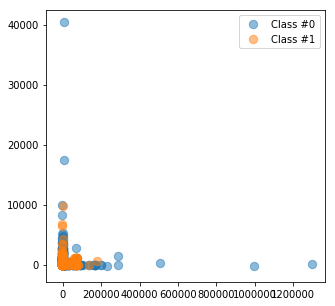

 acc_lr: 0.9933680947689646 
 acc_dt: 0.9720546891895139 
 acc_rf: 0.9880817934978494
 f1_lr: 0.007194244604316547 
 f1_dt: 0.03485477178423236 
 f1_rf: 0.035019455252918295
 fbeta_lr: 0.028490832157968975 
 fbeta_dt: 0.02203750844199699 
 fbeta_rf: 0.033486829987106274 

Target percentage 0.2
Tamaño de X: 2755


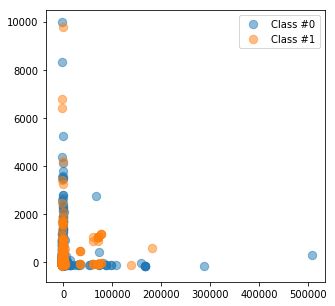

 acc_lr: 0.9879856789292837 
 acc_dt: 0.9675132758247832 
 acc_rf: 0.9765961025542447
 f1_lr: 0.007936507936507938 
 f1_dt: 0.02170767004341534 
 f1_rf: 0.03180914512922465
 fbeta_lr: 0.007726142665901703 
 fbeta_dt: 0.0132958883671947 
 fbeta_rf: 0.021167070535071063 

Target percentage 0.3
Tamaño de X: 1790


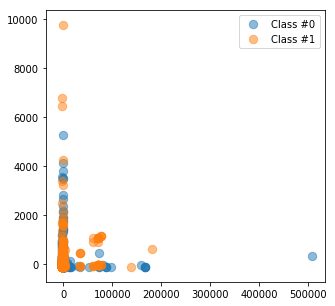

 acc_lr: 0.9801763702333182 
 acc_dt: 0.8601052454525795 
 acc_rf: 0.9150347213878943
 f1_lr: 0.030552291421856642 
 f1_dt: 0.014222824246528954 
 f1_rf: 0.012290502793296089
 fbeta_lr: 0.021579423124332323 
 fbeta_dt: 0.007490134105536378 
 fbeta_rf: 0.006657777644608908 

Target percentage 0.4
Tamaño de X: 1333


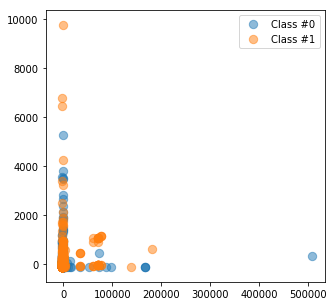

 acc_lr: 0.9612658288680107 
 acc_dt: 0.9336328904053632 
 acc_rf: 0.936348126967345
 f1_lr: 0.027744270205066344 
 f1_dt: 0.02609308885754584 
 f1_rf: 0.020702402957486134
 fbeta_lr: 0.01641174184888198 
 fbeta_dt: 0.014409377470165225 
 fbeta_rf: 0.011484497147150195 

Target percentage 0.5
Tamaño de X: 1079


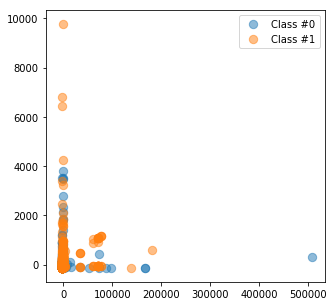

 acc_lr: 0.7872984597640388 
 acc_dt: 0.8411466468029891 
 acc_rf: 0.8653675180815532
 f1_lr: 0.017754105636928537 
 f1_dt: 0.01665922951063513 
 f1_rf: 0.014770529277299101
 fbeta_lr: 0.009213804742600732 
 fbeta_dt: 0.008727788965272473 
 fbeta_rf: 0.007791420620999365 



In [22]:
for target_percentage in [0.1, 0.2, 0.3, 0.4, 0.5]:
    X_u_train, y_u_train = UnderSampling(x_vis, y_train, target_percentage, 1)
    for model in models.keys():
        models[model].fit(X_u_train, y_u_train)
    y_pred_p2 = pd.DataFrame(index=X_test.index, columns=models.keys())
    y_table2 = pd.DataFrame(index=['acc_p2','f1_p2','f_beta_p2'],columns=models.keys())
    for model in models.keys():
        y_pred_p2[model] = models[model].predict(x_vis_test)
        y_table2[model][0] = metrics.accuracy_score(y_pred_p2[model], y_test)
        y_table2[model][1]= metrics.f1_score(y_pred_p2[model], y_test)
        y_table2[model][2]= metrics.fbeta_score(y_pred_p2[model], y_test,beta=10)
    print('Target percentage', target_percentage)
    print('Tamaño de X:' ,X_u_train.shape[0])
    plot_two_classes(X_u_train, y_u_train, size=(5, 5))
    plt.show() 
    print (' acc_lr:',metrics.accuracy_score(y_pred_p2['lr'], y_test),'\n','acc_dt:',metrics.accuracy_score(y_pred_p2['dt'], y_test),'\n','acc_rf:',metrics.accuracy_score(y_pred_p2['rf'], y_test))
    print (' f1_lr:',metrics.f1_score(y_pred_p2['lr'], y_test),'\n','f1_dt:',metrics.f1_score(y_pred_p2['dt'], y_test),'\n','f1_rf:',metrics.f1_score(y_pred_p2['rf'], y_test))
    print(' fbeta_lr:',metrics.fbeta_score(y_pred_p2['lr'], y_test,beta=10),'\n','fbeta_dt:',metrics.fbeta_score(y_pred_p2['dt'], y_test,beta=10),'\n','fbeta_rf:',metrics.fbeta_score(y_pred_p2['rf'], y_test,beta=10),'\n')

In [23]:
y_table2

,lr,dt,rf
acc_p2,0.787298,0.841147,0.865368
f1_p2,0.0177541,0.0166592,0.0147705
f_beta_p2,0.0092138,0.00872779,0.00779142


En la medida en que se va realizando tratamiento a los para descompensar su desbalanceo a travès del método de over sampling que se encarga de acomoda la serie de datos con menor número de observaciones a la de mayor número de observaciones es evidente que las mètricas de desempeño nos van acercandó más a la realidad de ese problem de desbalanceo. Se sigue comprobando que el accuracy no es una medida confiable ya que no tiene en cuenta la desproporción en los tamaños de las series que se están comparando.

Teniendo en cuenta que el fbeta es el método que más está castigando al modelo se considera que está centrando sus esfuerzos en los falsos negativos, que se convierten en los verdaderos elementos relevantes del modelo. Al final de esto, se concluye que el random forests sigue siendo el mètodo que más castiga este desbalance.

# Exercise 15.3

Same analysis using random-over-sampling

Definición función oversampling

In [24]:
import random
def OverSampling(X, y, target_percentage=0.5, seed=None):
    # Assuming minority class is the positive
    n_samples = y.shape[0]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()

    n_samples_1_new =  -target_percentage * n_samples_0 / (target_percentage- 1)
    n_samples_1_new =int(n_samples_1_new)

    np.random.seed(seed)
    filter_ = np.random.choice(X[y == 1].shape[0], int(n_samples_1_new))
    # filter_ is within the positives, change to be of all
    filter_ = np.nonzero(y == 1)[0][filter_]
    
    filter_ = np.concatenate((filter_, np.nonzero(y == 0)[0]), axis=0)
    return X[filter_], y[filter_]

## oversampling al training set

C:\Users\Usuario\Anaconda3\lib\site-packages\pandas\core\series.py:842: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


Target percentage 0.1
Tamaño de X: 107280


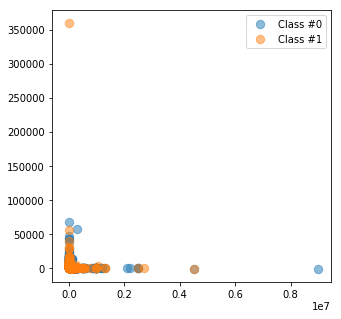

 acc_lr: 0.9940408967489247 
 acc_dt: 0.5011413605017181 
 acc_rf: 0.6019895715693107
 f1_lr: 0.0 
 f1_dt: 0.010391343724677057 
 f1_rf: 0.009567089213106911
 fbeta_lr: 0.0 
 fbeta_dt: 0.0053090090155258 
 fbeta_rf: 0.004902481274402434 



C:\Users\Usuario\Anaconda3\lib\site-packages\pandas\core\series.py:842: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


Target percentage 0.2
Tamaño de X: 120690


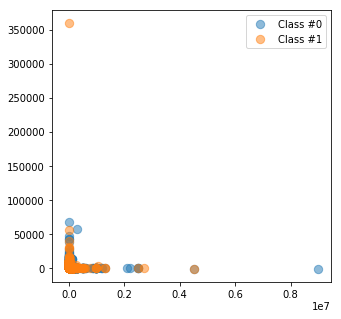

 acc_lr: 0.9940408967489247 
 acc_dt: 0.4586106639113824 
 acc_rf: 0.9183506740034121
 f1_lr: 0.0 
 f1_dt: 0.011841585895355467 
 f1_rf: 0.012783265543288786
 fbeta_lr: 0.0 
 fbeta_dt: 0.006044298256307503 
 fbeta_rf: 0.0069449436621919405 



C:\Users\Usuario\Anaconda3\lib\site-packages\pandas\core\series.py:842: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


Target percentage 0.3
Tamaño de X: 137931


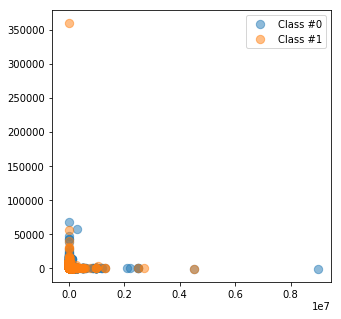

 acc_lr: 0.08018357882596054 
 acc_dt: 0.4441694499843814 
 acc_rf: 0.9486748203859
 f1_lr: 0.01054590570719603 
 f1_dt: 0.010691985287828243 
 f1_rf: 0.01747930082796688
 fbeta_lr: 0.005359281787571741 
 fbeta_dt: 0.005456050165410154 
 fbeta_rf: 0.009935540655983847 



C:\Users\Usuario\Anaconda3\lib\site-packages\pandas\core\series.py:842: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


Target percentage 0.4
Tamaño de X: 160920


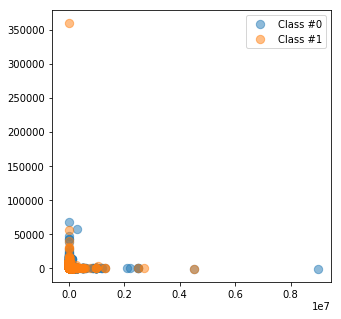

 acc_lr: 0.16526900064877334 
 acc_dt: 0.5014297042074153 
 acc_rf: 0.962731576038638
 f1_lr: 0.01082035365471682 
 f1_dt: 0.011246128186800096 
 f1_rf: 0.015238095238095238
 fbeta_lr: 0.005502280191934672 
 fbeta_dt: 0.005745705063770192 
 fbeta_rf: 0.009096026117302713 



C:\Users\Usuario\Anaconda3\lib\site-packages\pandas\core\series.py:842: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


Target percentage 0.5
Tamaño de X: 193104


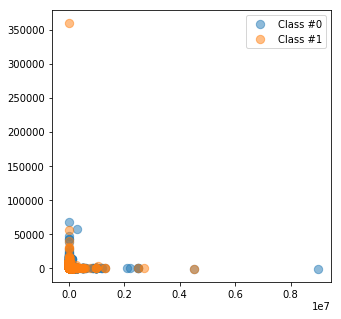

 acc_lr: 0.993728524401086 
 acc_dt: 0.46420933753033616 
 acc_rf: 0.9554028401855011
 f1_lr: 0.0 
 f1_dt: 0.010911994322214335 
 f1_rf: 0.014861995753715497
 fbeta_lr: 0.0 
 fbeta_dt: 0.005570489811200617 
 fbeta_rf: 0.008614334886837856 



In [25]:
for target_percentage in [0.1, 0.2, 0.3, 0.4, 0.5]:
    X_o_train, y_o_train = OverSampling(x_vis, y_train, target_percentage, 42)
    y_o_train.isnull()
    y_o_train.fillna(1, inplace=True)
    for model in models.keys():
        models[model].fit(X_o_train, y_o_train)
    y_pred_p3 = pd.DataFrame(index=X_test.index, columns=models.keys())
    y_table3 = pd.DataFrame(index=['acc_p3','f1_p3','f_beta_p3'],columns=models.keys())
    for model in models.keys():
        y_pred_p3[model] = models[model].predict(x_vis_test)
        y_table3[model][0] = metrics.accuracy_score(y_pred_p3[model], y_test)
        y_table3[model][1]= metrics.f1_score(y_pred_p3[model], y_test)
        y_table3[model][2]= metrics.fbeta_score(y_pred_p3[model], y_test,beta=10)
         
    print('Target percentage', target_percentage)
    print('Tamaño de X:' ,X_o_train.shape[0])
    plot_two_classes(X_o_train, y_o_train, size=(5, 5))
    plt.show()
    print (' acc_lr:',metrics.accuracy_score(y_pred_p3['lr'], y_test),'\n','acc_dt:',metrics.accuracy_score(y_pred_p3['dt'], y_test),'\n','acc_rf:',metrics.accuracy_score(y_pred_p3['rf'], y_test))
    print (' f1_lr:',metrics.f1_score(y_pred_p3['lr'], y_test),'\n','f1_dt:',metrics.f1_score(y_pred_p3['dt'], y_test),'\n','f1_rf:',metrics.f1_score(y_pred_p3['rf'], y_test))
    print(' fbeta_lr:',metrics.fbeta_score(y_pred_p3['lr'], y_test,beta=10),'\n','fbeta_dt:',metrics.fbeta_score(y_pred_p3['dt'], y_test,beta=10),'\n','fbeta_rf:',metrics.fbeta_score(y_pred_p3['rf'], y_test,beta=10),'\n')
    

In [26]:
y_table3

,lr,dt,rf
acc_p3,0.993729,0.464209,0.955403
f1_p3,0,0.010912,0.014862
f_beta_p3,0,0.00557049,0.00861433


Con el método de over sampling se evidencia que el fbeta para el método de regresión logística es igual a o, y que el valor más alto lo arroja el modelo Random Forests. LOS valores de precisión siguen siendo altos, aunque la "falsa" precisión la arroja el método de árboles de decisión.

# Exercise 15.4 (3 points)

Evaluate the results using SMOTE

Which parameters did you choose?

In [27]:
def SMOTE(X, y, target_percentage=0.5, k=5, seed=None):
    
    # New samples
    n_samples = y.shape[0]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()    
    n_samples_1_new =  int(-target_percentage * n_samples_0 / (target_percentage- 1) - n_samples_1)
    
    # A matrix to store the synthetic samples
    new = np.zeros((n_samples_1_new, x_vis.shape[1]))
    
    # Create seeds
    np.random.seed(seed)
    seeds = np.random.randint(1, 1000000, 3)
    
    # Select examples to use as base
    np.random.seed(seeds[0])
    sel_ = np.random.choice(y[y==1].shape[0], n_samples_1_new)
    
    # Define random seeds (2 per example)
    np.random.seed(seeds[1])
    nn__ = np.random.choice(k, n_samples_1_new)
    np.random.seed(seeds[2])
    steps = np.random.uniform(size=n_samples_1_new)  

    # For each selected examples create one synthetic case
    for i, sel in enumerate(sel_):
        # Select neighbor
        nn_ = nn__[i]
        step = steps[i]
        # Create new sample
        new[i, :] = X[y==1][sel] - step * (X[y==1][sel] - X[y==1][nn_])
    
    X = np.vstack((X, new))
    y = np.append(y, np.ones(n_samples_1_new))
    
    return X, y

Target percentage 0.25 k  5
y.shape =  128736 y.mean() =  0.25


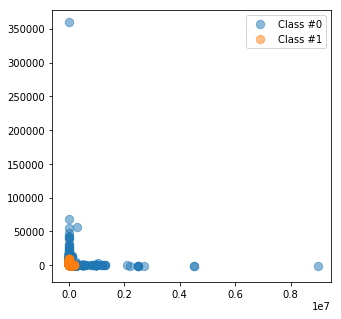

Tamaño de X: 128736
 acc_lr: 0.8160126871230506 
 acc_dt: 0.9395679650142971 
 acc_rf: 0.9669125597712473
 f1_lr: 0.014923452978258074 
 f1_dt: 0.014884449667058363 
 f1_rf: 0.017130620985010704
 fbeta_lr: 0.00777908358730222 
 fbeta_dt: 0.00830574130580623 
 fbeta_rf: 0.010462255600155379 

Target percentage 0.25 k  15
y.shape =  128736 y.mean() =  0.25


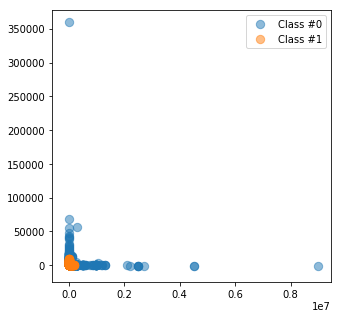

Tamaño de X: 128736
 acc_lr: 0.9922387485883173 
 acc_dt: 0.9553307542590768 
 acc_rf: 0.9670086743398131
 f1_lr: 0.006153846153846155 
 f1_dt: 0.018997361477572562 
 f1_rf: 0.022775800711743774
 fbeta_lr: 0.012249848392965435 
 fbeta_dt: 0.01100184574419801 
 fbeta_rf: 0.013901673190244743 

Target percentage 0.5 k  5
y.shape =  193104 y.mean() =  0.5


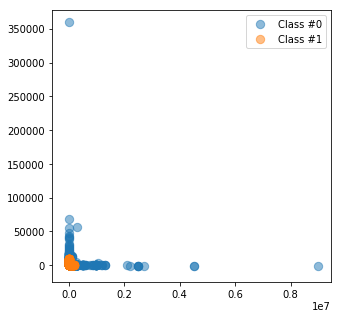

Tamaño de X: 193104
 acc_lr: 0.816084773049475 
 acc_dt: 0.9293798207463296 
 acc_rf: 0.9458634692553524
 f1_lr: 0.01492921492921493 
 f1_dt: 0.01672800267648043 
 f1_rf: 0.02171081198436822
 fbeta_lr: 0.007782183873688965 
 fbeta_dt: 0.009193686395164668 
 fbeta_rf: 0.012254604576670148 

Target percentage 0.5 k  15
y.shape =  193104 y.mean() =  0.5


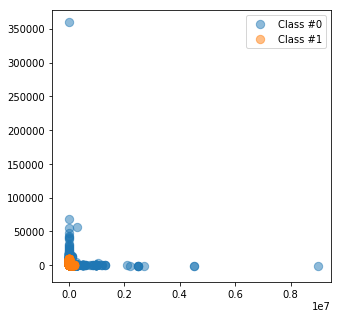

Tamaño de X: 193104
 acc_lr: 0.8086118653434894 
 acc_dt: 0.9133767450801356 
 acc_rf: 0.9402647956363986
 f1_lr: 0.01532945976016813 
 f1_dt: 0.014219305441618812 
 f1_rf: 0.018942383583267563
 fbeta_lr: 0.007980679160639525 
 fbeta_dt: 0.007690843327622311 
 fbeta_rf: 0.010578454690261625 



In [28]:
for target_percentage in [0.25, 0.5]:
    for k in [5, 15]:
        X_s_train, y_s_train = SMOTE(x_vis, y_train, target_percentage, k, seed=42)
        for model in models.keys():
            models[model].fit(X_s_train, y_s_train)
        y_pred_p4 = pd.DataFrame(index=X_test, columns=models.keys())
        y_table4 = pd.DataFrame(index=['acc_p4','f1_p4','f_beta_p4'],columns=models.keys())
        for model in models.keys():
            y_pred_p4[model] = models[model].predict(x_vis_test)
            y_table4[model][0] = metrics.accuracy_score(y_pred_p4[model], y_test)
            y_table4[model][1]= metrics.f1_score(y_pred_p4[model], y_test)
            y_table4[model][2]= metrics.fbeta_score(y_pred_p4[model], y_test,beta=10)
        print('Target percentage', target_percentage, 'k ', k)
        print('y.shape = ',y_s_train.shape[0], 'y.mean() = ', y_s_train.mean())
        plot_two_classes(X_s_train, y_s_train, size=(5, 5))
        plt.show()
        print('Tamaño de X:' ,X_s_train.shape[0])
        print (' acc_lr:',metrics.accuracy_score(y_pred_p4['lr'], y_test),'\n','acc_dt:',metrics.accuracy_score(y_pred_p4['dt'], y_test),'\n','acc_rf:',metrics.accuracy_score(y_pred_p4['rf'], y_test))
        print (' f1_lr:',metrics.f1_score(y_pred_p4['lr'], y_test),'\n','f1_dt:',metrics.f1_score(y_pred_p4['dt'], y_test),'\n','f1_rf:',metrics.f1_score(y_pred_p4['rf'], y_test))
        print(' fbeta_lr:',metrics.fbeta_score(y_pred_p4['lr'], y_test,beta=10),'\n','fbeta_dt:',metrics.fbeta_score(y_pred_p4['dt'], y_test,beta=10),'\n','fbeta_rf:',metrics.fbeta_score(y_pred_p4['rf'], y_test,beta=10),'\n')
    

In [29]:
y_table4

,lr,dt,rf
acc_p4,0.808612,0.913377,0.940265
f1_p4,0.0153295,0.0142193,0.0189424
f_beta_p4,0.00798068,0.00769084,0.0105785


Con el método SMOTE, se obtiene la precisión más baja para el fbeta correspondiente a la regresión logística. Del otro lado, el mejor valor para esta varirable se obtiene por medio de un Random Forests.

# Exercise 15.5 (3 points)

Evaluate the results using Adaptive Synthetic Sampling Approach for Imbalanced
Learning (ADASYN)

http://www.ele.uri.edu/faculty/he/PDFfiles/adasyn.pdf
https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.ADASYN.html#rf9172e970ca5-1

In [30]:
!pip install imblearn

In [31]:
from collections import Counter
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=42)
X_ada, y_ada = ada.fit_resample(x_vis, y_train)
print(x_vis[y_train==0].shape[0])
print(X_ada.shape[0])

96552
192978


Tamaño de X: 192978


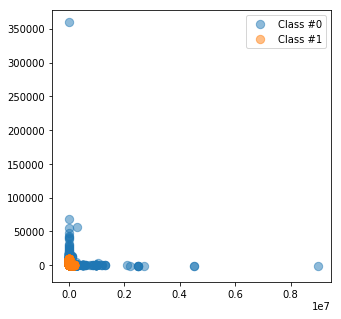

 acc_lr: 0.7839584785063796 
 acc_dt: 0.9665521301391259 
 acc_rf: 0.9653747266741957
 f1_lr: 0.01791370835608957 
 f1_dt: 0.023842917251051893 
 f1_rf: 0.025693035835023664
 fbeta_lr: 0.009292618752419369 
 fbeta_dt: 0.014508428746461617 
 fbeta_rf: 0.015520239395042257 



In [32]:
for model in models.keys():
    models[model].fit(X_ada, y_ada)
y_pred_p5 = pd.DataFrame(index=X_test.index, columns=models.keys())
y_table5 = pd.DataFrame(index=['acc_p5','f1_p5','f_beta_p5'],columns=models.keys())
for model in models.keys():
    y_pred_p5[model] = models[model].predict(x_vis_test)
    y_table5[model][0] = metrics.accuracy_score(y_pred_p5[model], y_test)
    y_table5[model][1]= metrics.f1_score(y_pred_p5[model], y_test)
    y_table5[model][2]= metrics.fbeta_score(y_pred_p5[model], y_test,beta=10)    
print('Tamaño de X:' ,X_ada.shape[0])
plot_two_classes(X_ada, y_ada, size=(5, 5))
plt.show()
print (' acc_lr:',metrics.accuracy_score(y_pred_p5['lr'], y_test),'\n','acc_dt:',metrics.accuracy_score(y_pred_p5['dt'], y_test),'\n','acc_rf:',metrics.accuracy_score(y_pred_p5['rf'], y_test))
print (' f1_lr:',metrics.f1_score(y_pred_p5['lr'], y_test),'\n','f1_dt:',metrics.f1_score(y_pred_p5['dt'], y_test),'\n','f1_rf:',metrics.f1_score(y_pred_p5['rf'], y_test))
print(' fbeta_lr:',metrics.fbeta_score(y_pred_p5['lr'], y_test,beta=10),'\n','fbeta_dt:',metrics.fbeta_score(y_pred_p5['dt'], y_test,beta=10),'\n','fbeta_rf:',metrics.fbeta_score(y_pred_p5['rf'], y_test,beta=10),'\n')    

In [33]:
y_table5

,lr,dt,rf
acc_p5,0.783958,0.966552,0.965375
f1_p5,0.0179137,0.0238429,0.025693
f_beta_p5,0.00929262,0.0145084,0.0155202


Con este mètodo de aprendizaje se obtienes estadìsticas significativamente mejores para los tres métodos estudiados puntualmente para el fbeta.

# Exercise 15.6 (3 points)

Compare and comment about the results

In [34]:
resultados=pd.concat([y_table, y_table2, y_table3, y_table4, y_table5],keys=['Desbalanceado','Undersampling','Oversampling','Smote','ADASYN'])

In [35]:
resultados

lr          dt          rf
Desbalanceado acc          0.994113    0.989163    0.994113
              f_1                 0    0.137667    0.115523
              f_beta              0    0.129649    0.469086
Undersampling acc_p2       0.787298    0.841147    0.865368
              f1_p2       0.0177541   0.0166592   0.0147705
              f_beta_p2   0.0092138  0.00872779  0.00779142
Oversampling  acc_p3       0.993729    0.464209    0.955403
              f1_p3               0    0.010912    0.014862
              f_beta_p3           0  0.00557049  0.00861433
Smote         acc_p4       0.808612    0.913377    0.940265
              f1_p4       0.0153295   0.0142193   0.0189424
              f_beta_p4  0.00798068  0.00769084   0.0105785
ADASYN        acc_p5       0.783958    0.966552    0.965375
              f1_p5       0.0179137   0.0238429    0.025693
              f_beta_p5  0.00929262   0.0145084   0.0155202

En la medida en que se hace tratamiento a los datos, los valores del accuracy para la regresión logística tienen un comportamiento oscilante. Cuando se aplica alguna de las técnicas, tanto el oversampling como el ADASYN son los que arrojan el valor más bajo. La regresión logística presenta algunas inconsistencias, y en muchos de los casos de evaluación de cualquiera de las técnicas arroja valores de 0.

En términos generales, el modelo random forests es el que ofrece los mejores resultados para cada uno de los tratamientos aplicados, aunque específicamente los valores de fbeta no alcanzan nunca una precisión cercana al 2%, lo que se traduce en que el desbalanceo de los datos es lo suficientemente grande para no permitir crear un modelo consistente en el que se puedan sacar conclusiones veraces. Cuando fbeta tiende a cero se está enfocando e la presición del modelo y se deja de lado el recall o sensitividad del mismo.

Se concluye de manera clara que el accuracy no es una medida confiable en la medida en que haya un desbalance tan grande en las observaciones y que se debe tener muy claro el contexto del problema para saber y creer que los resultados que se están obteniendo son válidos.

